# COVID-19 ANALYSIS USING VISULALIZATION

# -----------------------------------------------------------------------------------------------------------------------------------

The coronaviruses are specific type of viruses which affects the respiratory tracts. They cause several illnesses, ranging from colds and pneumonia to Severe Acute Respiratory Syndrome (SARS). The outbreak of COVID-19, as the newest coronavirus discovered was named, started in the city of Wuhan, China, at the end of December 2019. On March 11, 2020, the World Health Organization officially declared the novel coronavirus a pandemic, as the virus spread in more than a hundred countries, causing over four thousand deaths.
(References: https://www.statista.com/)

#### IMPORTING LIBRARIES

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)

#### LOADING DATASET

In [ ]:
covid_df=pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv")


In [ ]:
covid_df.head # This function returns the first n rows for the object based on position.

<bound method NDFrame.head of              Date      Country  Confirmed  Recovered  Deaths
0      2020-01-22  Afghanistan          0          0       0
1      2020-01-23  Afghanistan          0          0       0
2      2020-01-24  Afghanistan          0          0       0
3      2020-01-25  Afghanistan          0          0       0
4      2020-01-26  Afghanistan          0          0       0
...           ...          ...        ...        ...     ...
58823  2020-11-20     Zimbabwe       9120       8229     265
58824  2020-11-21     Zimbabwe       9172       8235     265
58825  2020-11-22     Zimbabwe       9220       8250     268
58826  2020-11-23     Zimbabwe       9308       8288     273
58827  2020-11-24     Zimbabwe       9398       8297     274

[58828 rows x 5 columns]>

In [ ]:
covid_df.describe #Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution.

<bound method NDFrame.describe of              Date      Country  Confirmed  Recovered  Deaths
0      2020-01-22  Afghanistan          0          0       0
1      2020-01-23  Afghanistan          0          0       0
2      2020-01-24  Afghanistan          0          0       0
3      2020-01-25  Afghanistan          0          0       0
4      2020-01-26  Afghanistan          0          0       0
...           ...          ...        ...        ...     ...
58823  2020-11-20     Zimbabwe       9120       8229     265
58824  2020-11-21     Zimbabwe       9172       8235     265
58825  2020-11-22     Zimbabwe       9220       8250     268
58826  2020-11-23     Zimbabwe       9308       8288     273
58827  2020-11-24     Zimbabwe       9398       8297     274

[58828 rows x 5 columns]>

#### TOTAL COUNTRIES

In [ ]:
print("Total number of countries are : ",covid_df['Country'].nunique()) #Count distinct observations over requested axis.By default axis=0
#The axis to use. 0 or ‘index’ for row-wise, 1 or ‘columns’ for column-wise.

Total number of countries are :  191


#### TOP 10 COUNTRIES WITH MOST CONFIRMED CASES :

In [ ]:
Tot_cases=covid_df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).to_frame().head(10)
Tot_cases.style.background_gradient(cmap='Reds') #Color the background in a gradient style.
#The background color is determined according to the data in each column .

,Confirmed
Country,
US,1115271912
India,720059727
Brazil,635075762
Russia,196741922
Spain,121695156
France,117877507
Peru,108259636
Mexico,102873484
United Kingdom,102697509


Here, we can see that US has maximum number of confirmed cases followed by India and Brazil.

#### TOP 10 COUNTRIES WITH MOST DEATHS :

In [ ]:
Tot_deaths=covid_df.groupby('Country')['Deaths'].sum().sort_values(ascending=False).to_frame().head(10)
Tot_deaths.style.background_gradient(cmap='Reds')

,Deaths
Country,
US,35587943
Brazil,20336593
India,11884253
Mexico,10793548
United Kingdom,9079030
Italy,8212820
France,7134058
Spain,6955568
Iran,4310041


Here, we can see that US has maximum number of deaths followed by Brazil and India.

#### TOP 10 COUNTRIES WITH MOST RECOVERED CASES :

In [ ]:
Tot_recovered=covid_df.groupby('Country')['Recovered'].sum().sort_values(ascending= False).to_frame().head(10)
Tot_recovered.style.background_gradient(cmap='Reds')

,Recovered
Country,
India,605237151
Brazil,526735513
US,392402809
Russia,143307232
Peru,84670143
Mexico,83397214
Colombia,82705562
South Africa,74792217
Argentina,72173927


Here, we can see that India has maximum number of recoveres followed by Brazil and US.

In [ ]:
global_data=covid_df.copy().drop(['Date','Country'],axis=1) #Total data of all countries.
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary.style.format("{:,.0f}")

,Confirmed,Recovered,Deaths
0,"4,961,945,290","3,135,908,867","163,440,474"


This shows the total aggregate of Confirmed cases, recovered cases and deaths of all countries.

In [ ]:
confirmed_ta=covid_df.copy().drop(['Country','Recovered','Deaths'],axis=1)


### TOTAL CONFIRMED CASES TILL DATE :

In [ ]:
confirmed_ta_summary= confirmed_ta.sum()


In [ ]:
confirmed_ta_summary


Date         2020-01-222020-01-232020-01-242020-01-252020-0...
Confirmed                                           4961945290
dtype: object

## VISUALIZATION

##### CONFIRMED CASES

In [ ]:
conf_case=covid_df.copy().drop(['Date'],axis=1)
conf_case=conf_case['Confirmed'].groupby(conf_case['Country']).sum()


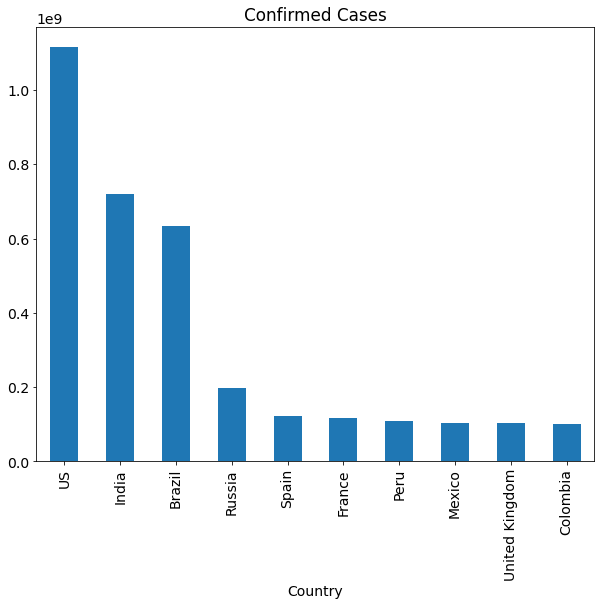

In [ ]:
conf_case=conf_case.sort_values(ascending=False)
conf_case.head(10).plot.bar(title='Confirmed Cases') #bar plot

The above bar plot shows top 10 countries with most confirmed cases.

##### RECOVERED CASES

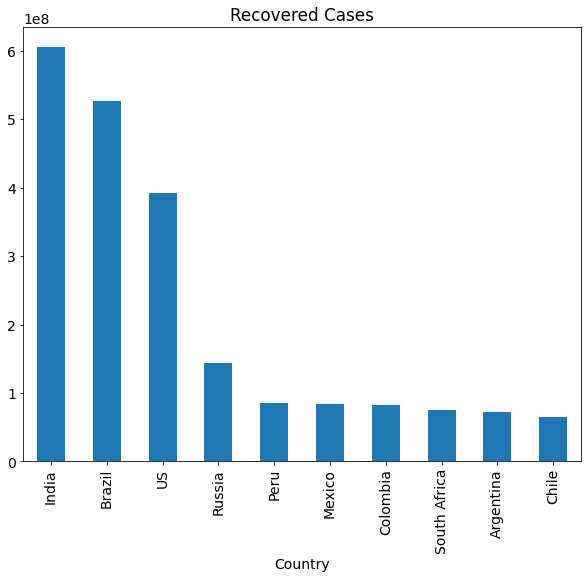

In [ ]:
rec_case=covid_df.copy().drop(['Date'],axis=1)
rec_case=rec_case['Recovered'].groupby(rec_case['Country']).sum()
rec_case=rec_case.sort_values(ascending=False)
rec_case.head(10).plot.bar(title='Recovered Cases')

The above bar plot shows top 10 countries with most Recovered cases.

##### DEATHS

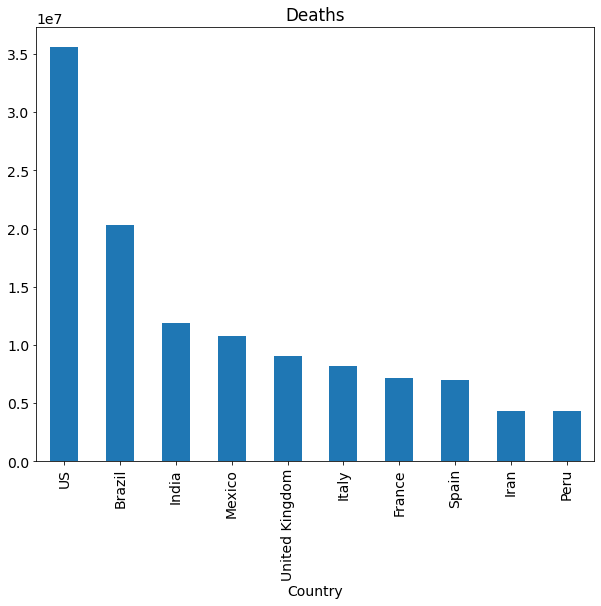

In [ ]:
death_case=covid_df.copy().drop(['Date'],axis=1)
death_case=death_case['Deaths'].groupby(death_case['Country']).sum()
death_case=death_case.sort_values(ascending=False)
death_case.head(10).plot.bar(title='Deaths')

The above bar plot shows top 10 countries with most number of deaths.

According to Johns Hopkins University, which has been compiling COVID-19 data from all over the world, India’s death toll is the third-worst.

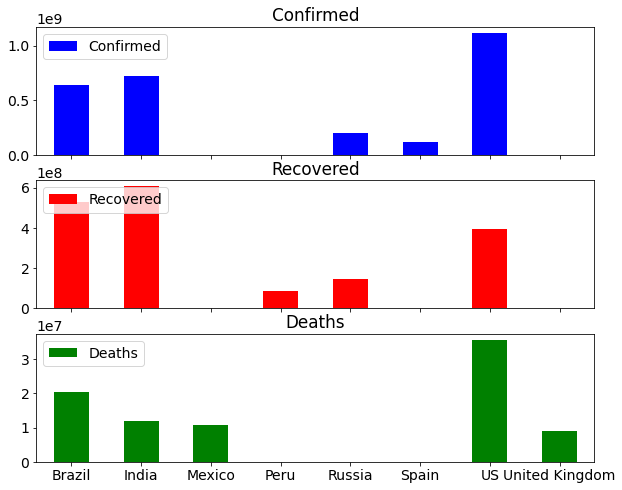

In [ ]:
#This is the combined graph of confirmed cases, recovered cases an deaths.
data_fra= pd.DataFrame({'Confirmed': conf_case.head(5),
                   'Recovered': rec_case.head(5), 'Deaths':death_case.head(5)})
axes = data_fra.plot.bar(rot=0, subplots=True,color={"r","b","g"})
axes[1].legend(loc=2) 

In [ ]:
temp3=covid_df.copy()  #Make a copy of this object’s indices and data.
temp3['Date']=pd.to_datetime(temp3.Date)  #Convert argument to datetime.

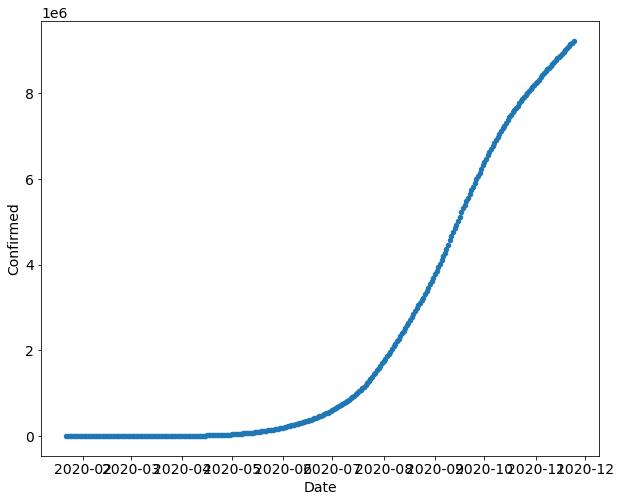

In [ ]:
ax2=temp3[temp3['Country']=='India'].plot.scatter(x='Date',y='Confirmed') #scatter plot

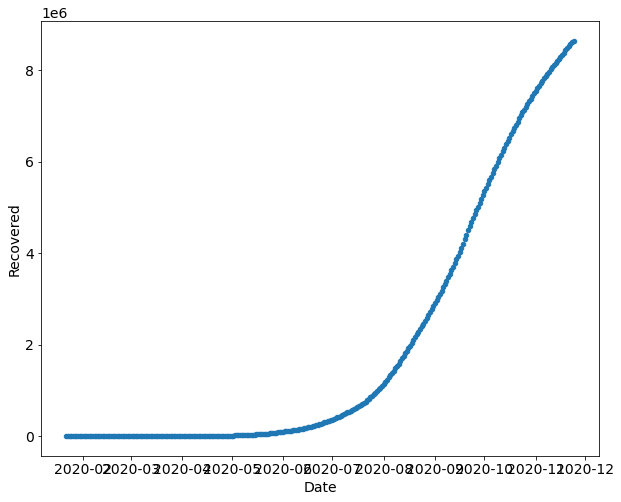

In [ ]:
ax3=temp3[temp3['Country']=='India'].plot.scatter(x='Date',y='Recovered')


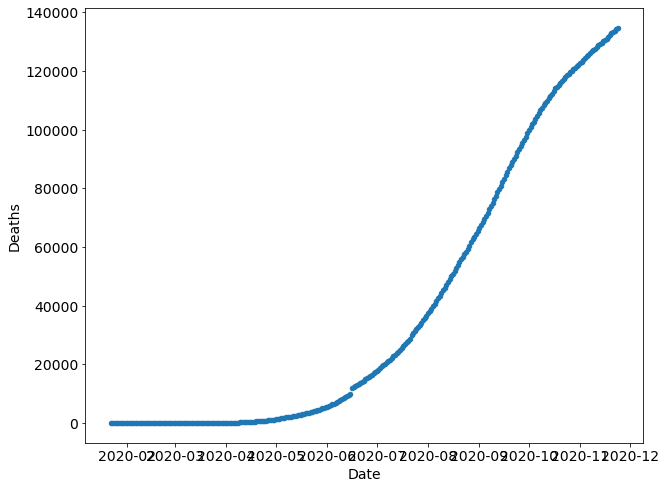

In [ ]:
ax4=temp3[temp3['Country']=='India'].plot.scatter(x='Date',y='Deaths')


The above graphs shows the scatter plot of confirmed cases,recovered cases,deaths of India since February 2020.
OBSERVATIONS:
    In the inital Months the rate of confirmed cases was slow.Relatively the rate of recovered cases and deaths were also slow.
    But, after the month of June the graph has risen exponentially.
    

A 21-day lock-down across the country was imposed from 26 March to 14 April to curb the spread of the coronavirus pandemic.

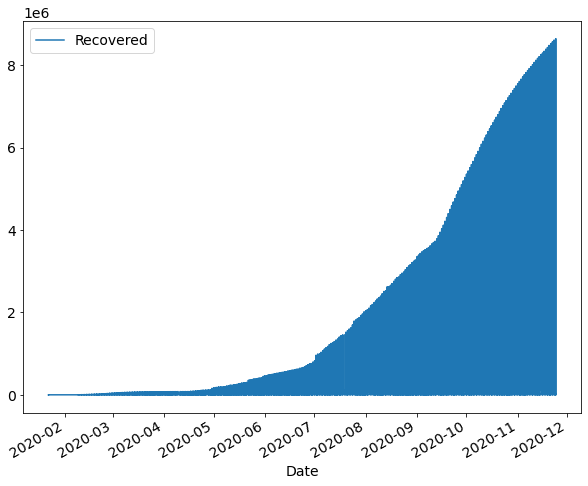

In [ ]:
ax5=temp3.plot.line(x='Date',y='Recovered', subplots=True) # Line plot


The above line plot shows the recovered cases.



### USA

The first cases in North America were reported in the United States in January 2020.

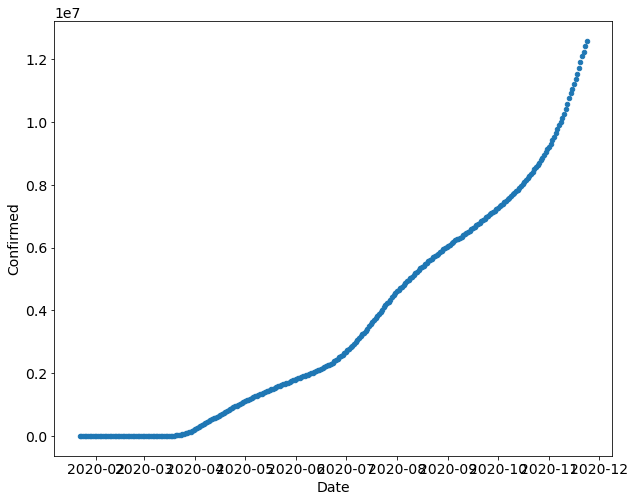

In [ ]:
ax6=temp3[temp3['Country']=='US'].plot.scatter(x='Date',y='Confirmed')

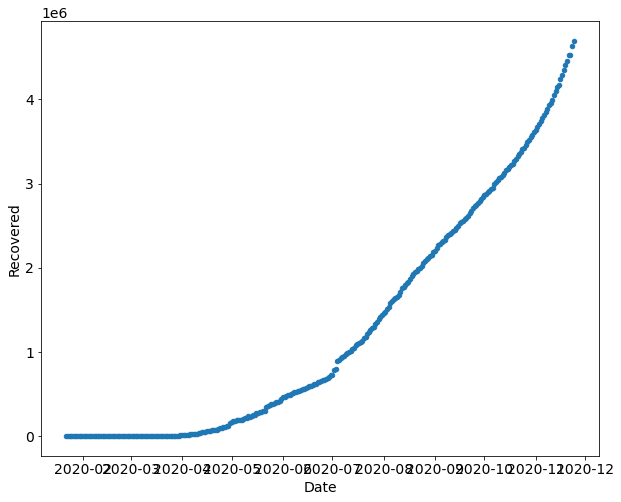

In [ ]:
ax7=temp3[temp3['Country']=='US'].plot.scatter(x='Date',y='Recovered')


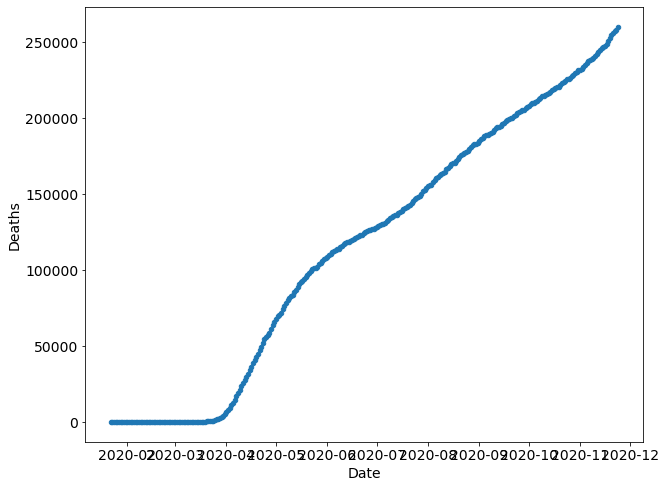

In [ ]:
ax8=temp3[temp3['Country']=='US'].plot.scatter(x='Date',y='Deaths')

The above graphs shows the scatter plot of confirmed cases,recovered cases,deaths in US since February 2020.
OBSERVATIONS:
    We can see that, compared to India,the confirmed cases begin to rise during the initial months in the US.
    Similar trend is followed in the deaths.There has been a steep rise in the number of deaths after the month of March.

### ITALY

Italy, a member state of the European Union and a popular tourist destination, joined the list of coronavirus-affected countries on 30 January when two COVID-19 positive cases were reported in Chinese tourists.

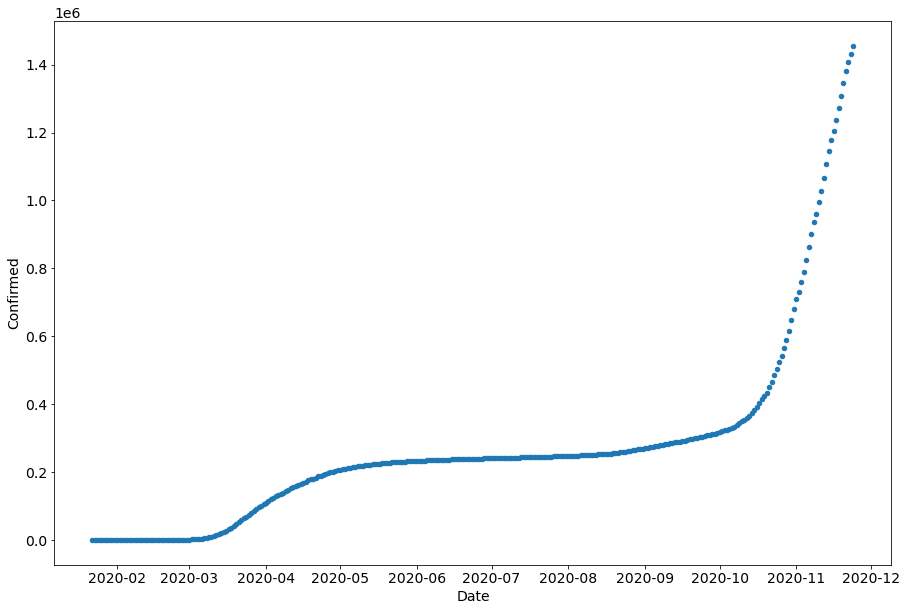

In [ ]:
ax9=temp3[temp3['Country']=='Italy'].plot.scatter(x='Date',y='Confirmed')

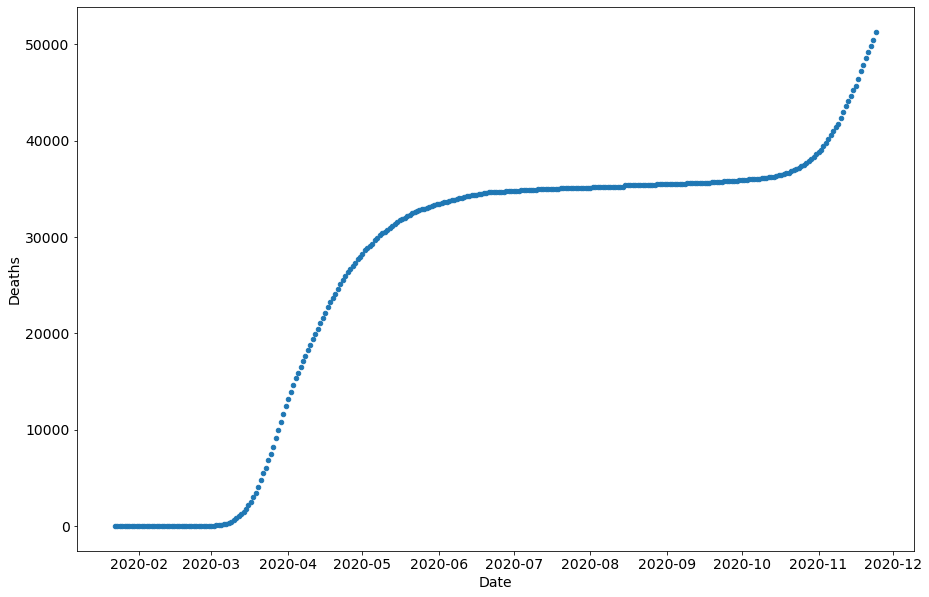

In [ ]:
ax10=temp3[temp3['Country']=='Italy'].plot.scatter(x='Date',y='Deaths')


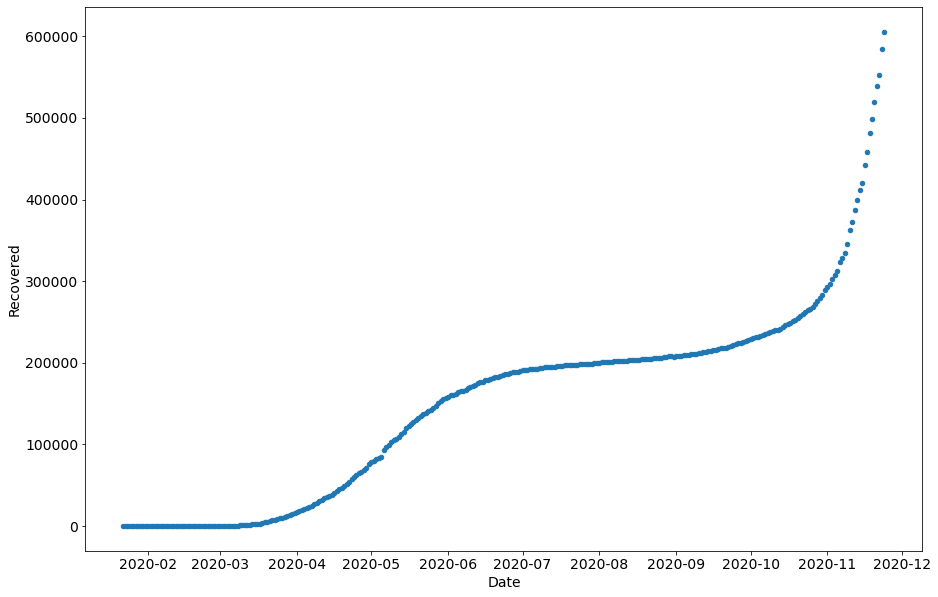

In [ ]:
ax11=temp3[temp3['Country']=='Italy'].plot.scatter(x='Date',y='Recovered')

The above graphs shows the scatter plot of confirmed cases,recovered cases,deaths in Italy since February 2020.
OBSERVATIONS:
    There has been an intresting pattern in Italy. Here Number of cases begin to rise after the month of March.But relatively there has been a huge numbe of deaths.
    Till the month of October the rate of confirmed cases was approximately linear,but suddenly the number of confirmed cases as well as deaths also begin to increase.

 Italy recorded roughly 1.4 million cases of coronavirus (COVID-19), representing one of the most affected countries worldwide. Currently, the regions with the highest number of cases are Lombardy, Piedmont, and Emilia-Romagna, located in the north of the country. Demographic data on the infected patients show that COVID-19 in Italy hit people from all ages groups.

### CREATING DATAFRAME FOR INDIA

India reported the first confirmed case of the coronavirus infection on 30 January 2020 in the state of Kerala. The affected had a travel history from Wuhan, China.

In [ ]:
df_india=covid_df[covid_df['Country']=="India"]

In [ ]:
df_india.tail(5)  #This shows the data of previous 5 days.

,Date,Country,Confirmed,Recovered,Deaths
24635,2020-11-20,India,9050597,8478124,132726
24636,2020-11-21,India,9095806,8521617,133227
24637,2020-11-22,India,9139865,8562641,133738
24638,2020-11-23,India,9177840,8604955,134218
24639,2020-11-24,India,9222216,8642771,134699


In [ ]:
india_tail=pd.DataFrame(df_india.tail(10))


In [ ]:
india_tail

,Date,Country,Confirmed,Recovered,Deaths
24630,2020-11-15,India,8845127,8249579,130070
24631,2020-11-16,India,8874290,8290370,130519
24632,2020-11-17,India,8912907,8335109,130993
24633,2020-11-18,India,8958483,8383602,131578
24634,2020-11-19,India,9004365,8428409,132162
24635,2020-11-20,India,9050597,8478124,132726
24636,2020-11-21,India,9095806,8521617,133227
24637,2020-11-22,India,9139865,8562641,133738
24638,2020-11-23,India,9177840,8604955,134218
24639,2020-11-24,India,9222216,8642771,134699


This is the data of last 10 days.Here we can easily see how the covid cases are increasing recently.

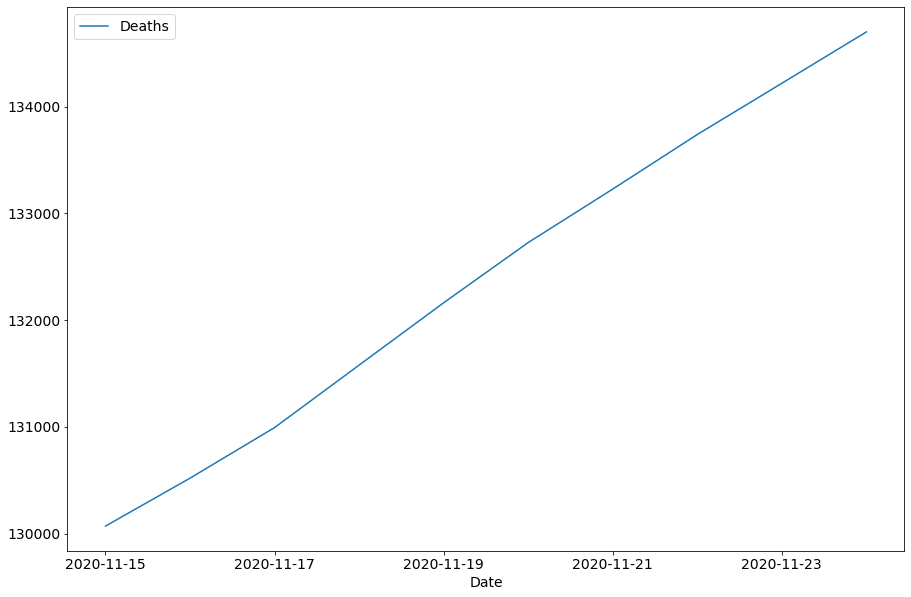

In [ ]:
india_tail.plot(x='Date', y='Deaths')

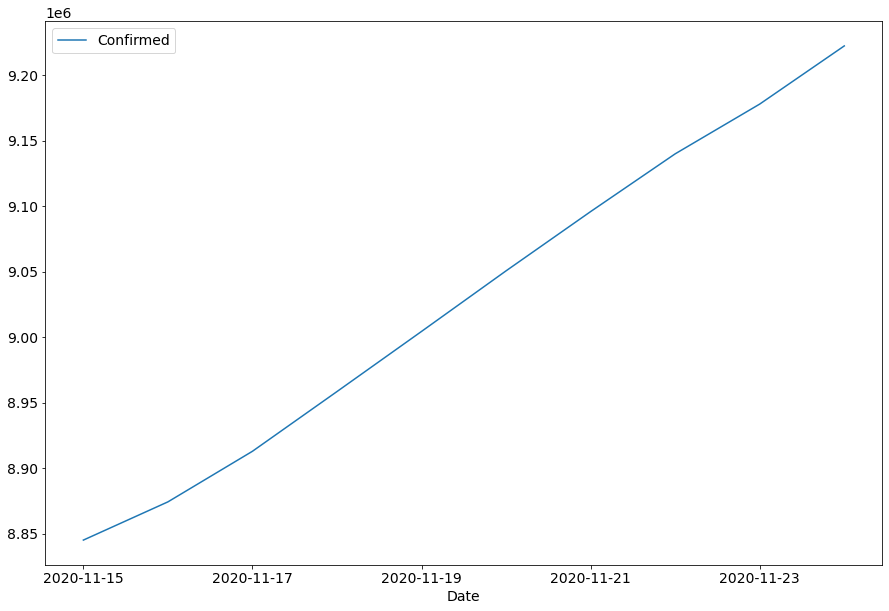

In [ ]:
india_tail.plot(x='Date', y='Confirmed')


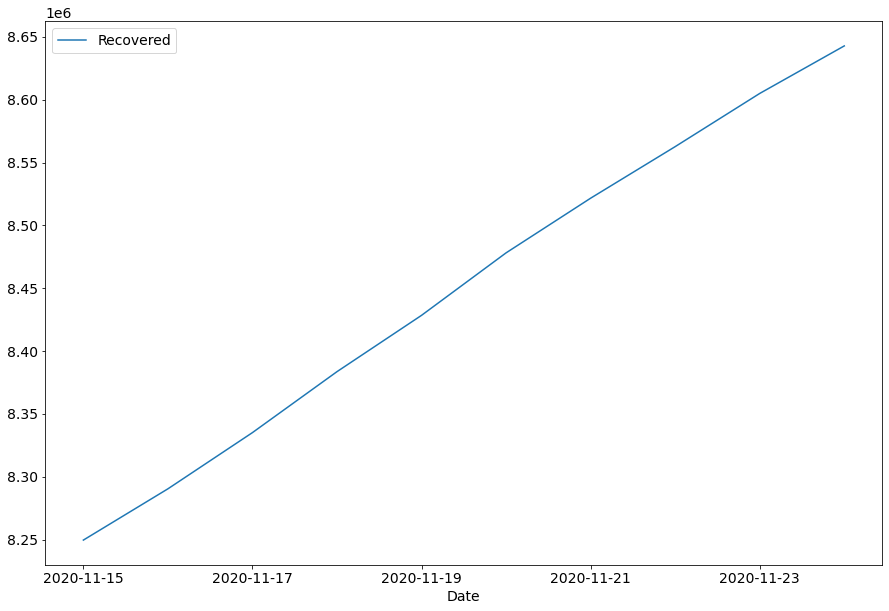

In [ ]:
india_tail.plot(x='Date', y='Recovered')

The above graph shows the visual representation of what is the trend of confirmed cases, recovered cases and deaths in India in last 10 days.

India’s COVID-19 tally had crossed the 20-lakh mark on August 7, 30 lakh on August 23 and 40 lakh on September 5. It went past 50 lakh on September 16, 60 lakh on September 28, 70 lakh on October 11, crossed 80 lakh on October 29, and surpassed 90 lakh on November 20.

###### COMBINED GRAPH

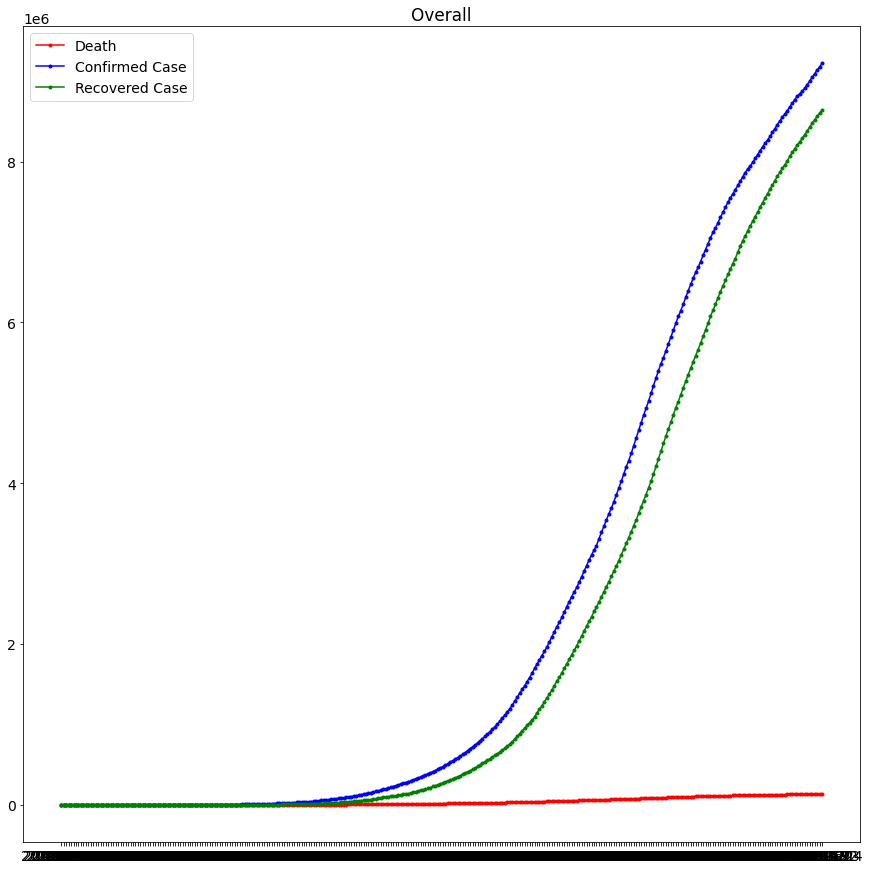

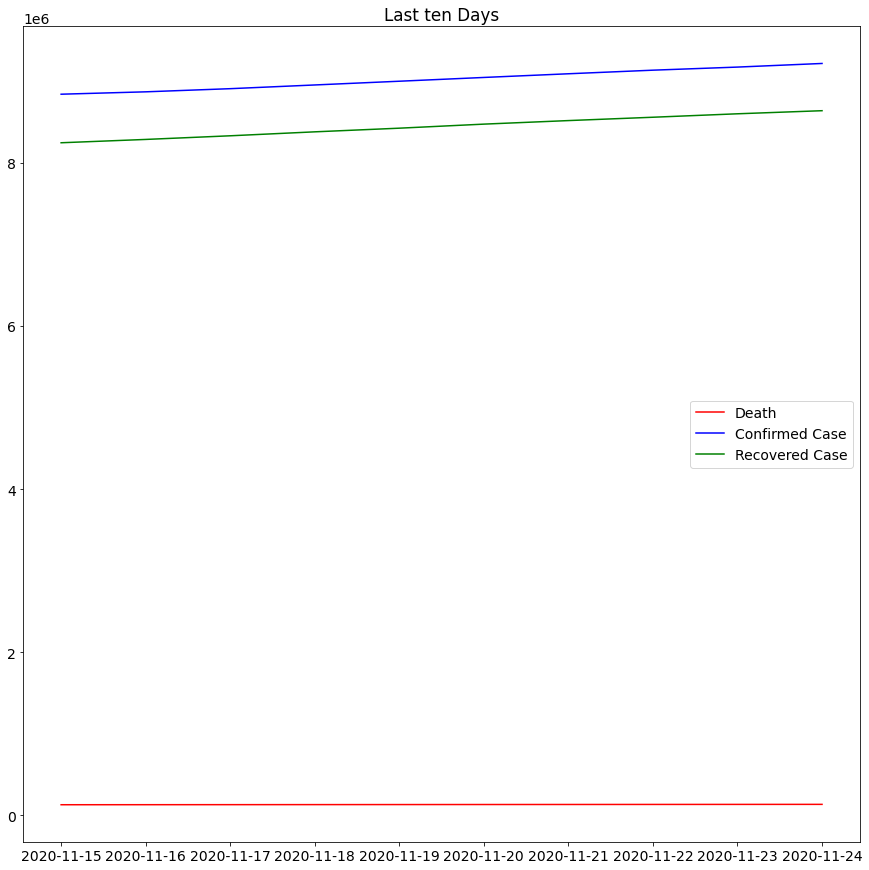

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(df_india.Date, df_india.Deaths,marker='.',color="r")
plt.plot(df_india.Date, df_india.Confirmed,marker='.',color="b")
plt.plot(df_india.Date, df_india.Recovered,marker='.',color="g")
plt.title("Overall")

plt.legend(["Death","Confirmed Case","Recovered Case"],loc=0)
plt.show()

plt.plot(india_tail.Date, india_tail.Deaths,"r")
plt.plot(india_tail.Date, india_tail.Confirmed,"b")
plt.plot(india_tail.Date, india_tail.Recovered,"g")
plt.title("Last ten Days")
plt.legend(["Death","Confirmed Case","Recovered Case"],loc=0)
plt.show()

This is the combined graph representing the confirmed cases,recovered cases and deaths.Confirmed cases are represented using blue colour,Recovered cases are represented using green colour and deaths is been reprsented using red colour.

If we see the overall graph as well as the graph of last 10 days, blue line is above green line.This indicates that confirmed cases are still greater than recovered cases.However, Red line indicating the number of deaths has negligiable slope as compared to the two.This indicates that mortality rate is less.

##### PIE CHART

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
labels = 'Recovered', 'Deaths', 'Active Cases'
rec_case=df_india.Recovered.tail(1).sum() #current number of recovered cases.
death_case=df_india.Deaths.tail(1).sum() #current number of deaths.
active_case=df_india.Confirmed.tail(1).sum() -(rec_case+death_case) # calculating current cases by subtracting confirmed cases with the recovered cases and deaths.

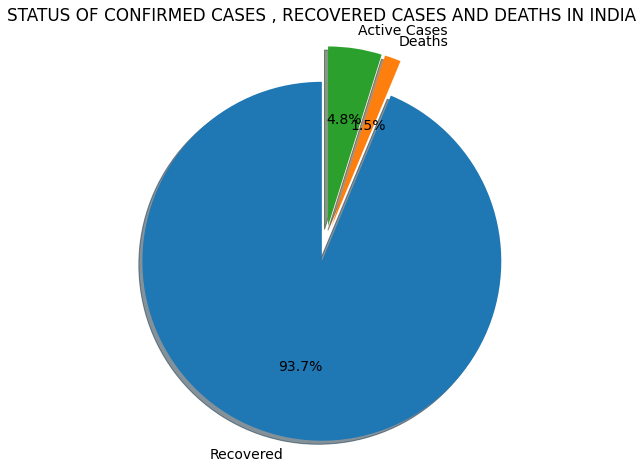

In [ ]:
sizes = [rec_case,death_case,active_case]
explode = (0.1, 0.1, 0.1) 

#fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title("STATUS OF CONFIRMED CASES , RECOVERED CASES AND DEATHS IN INDIA")

plt.show()

Looking at the above pie chart, the percentage of recovered cases is far greater than the active cases and the number of deaths.

In [ ]:
wo=covid_df[covid_df['Date']=='2020-11-24']
wo_conf_sum=wo.Confirmed.sum()
wo_rec_sum=wo.Recovered.sum()
wo_death_sum=wo.Deaths.sum()
wo_act_sum=wo_conf_sum - (wo_rec_sum + wo_death_sum)

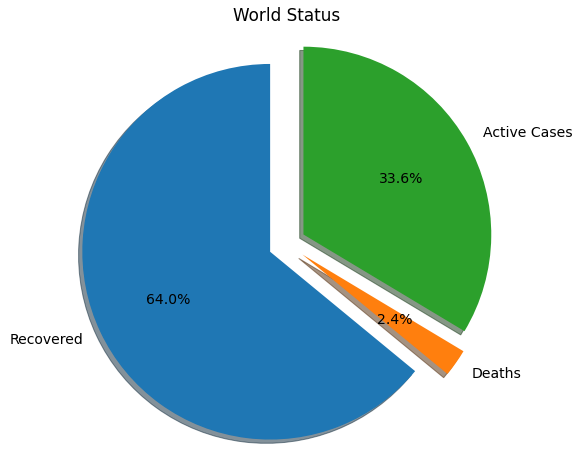

In [ ]:
sizes1=[wo_rec_sum, wo_death_sum , wo_act_sum]
plt.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title("World Status")

plt.show()

Looking at the above pie chart, the percentage of recovered cases is greater than the active cases and the number of deaths.As of 24-11-2020 there are 33.6% of total active cases,64.0% of recovered cases and 2.4% deaths in the world.